In [1]:
# package(s) related to time, space and id
import datetime
import platform
import random
import os

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy

# spatial libraries 
import pyproj
import shapely.geometry
from simplekml import Kml, Style

# package(s) for data handling
import numpy as np
import matplotlib.pyplot as plt

# tranport network analysis package
import transport_network_analysis.core as core

# Used for mathematical functions
import math             

# Used for making the graph to visualize our problem
import networkx as nx  

# Graph location
location_graph = "Shape-Files/Rotterdam-Antwerpen-corridor"
name_graph = "edges_2.shp"

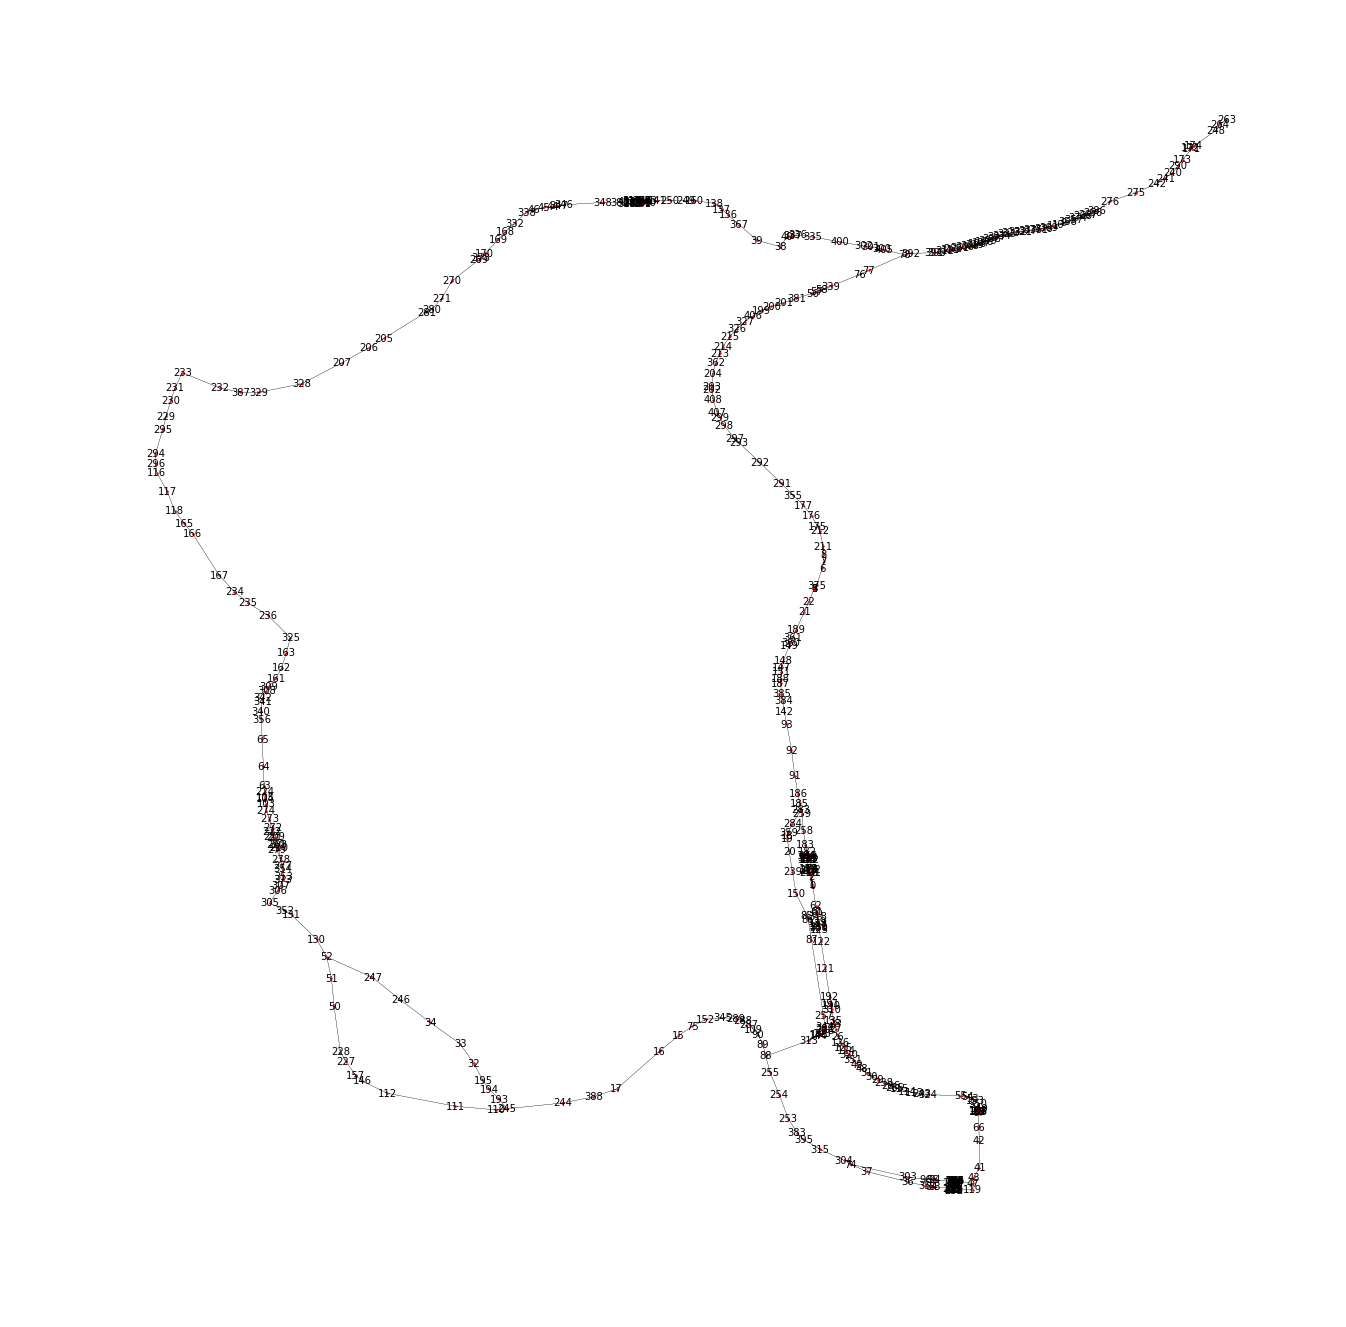

In [2]:
# Read the shape-file
FG = nx.read_shp(os.path.join(location_graph, name_graph), 
                 simplify=True)

# calculate distance between two points
def calculate_distance(orig, dest):
    wgs84 = pyproj.Geod(ellps='WGS84')
    
    distance = wgs84.inv(shapely.geometry.asShape(orig).x, shapely.geometry.asShape(orig).y, 
                         shapely.geometry.asShape(dest).x, shapely.geometry.asShape(dest).y)[2]
    
    return distance

H_G = nx.Graph()

lat_lon_to_index = {}
edge_id_counter = 0

for i, node in enumerate(FG.nodes(data = True)):
    H_G.add_node(i, pos = node[0], 
                    name = "Node {}".format(i),
                    geometry = shapely.geometry.Point(node[0][0], node[0][1]))
    lat_lon_to_index[node[0]] = i

    
for edge in FG.edges(data=True): 
    H_G.add_edge(lat_lon_to_index[edge[0]], 
                 lat_lon_to_index[edge[1]],
                 dis= calculate_distance(nx.get_node_attributes(H_G, 'geometry')[lat_lon_to_index[edge[1]]], 
                                         nx.get_node_attributes(H_G, 'geometry')[lat_lon_to_index[edge[0]]]))

FG = H_G.to_directed()
plt.figure(figsize=(18,18))
nx.draw(FG, nx.get_node_attributes(FG, 'pos'), with_labels=True, node_size=2, font_size = 10, width = 0.2, arrowsize = 3)
plt.show()

In [3]:
# From Volkeraklocks to Antwerp via the Schelde-Rhine canal
FG.remove_edge(239,150)
FG.remove_edge(155,156)
Start_ScheldeRhine = 263
End_ScheldeRhine = 41

path_ScheldeRhine = nx.dijkstra_path(FG, Start_ScheldeRhine, End_ScheldeRhine)
print("Schelde-Rhine route:",path_ScheldeRhine)

Schelde-Rhine route: [263, 264, 248, 174, 171, 173, 290, 240, 241, 242, 275, 276, 386, 266, 267, 268, 374, 357, 358, 9, 10, 11, 369, 370, 371, 376, 377, 321, 322, 323, 333, 334, 397, 398, 399, 196, 197, 198, 319, 368, 260, 261, 262, 311, 312, 390, 391, 392, 78, 77, 76, 339, 58, 57, 56, 381, 201, 200, 199, 406, 327, 326, 215, 214, 213, 362, 204, 203, 202, 408, 407, 299, 298, 297, 293, 292, 291, 355, 177, 176, 175, 212, 211, 8, 7, 6, 375, 5, 4, 3, 22, 21, 189, 361, 360, 149, 148, 147, 151, 188, 187, 385, 384, 142, 93, 92, 91, 186, 185, 283, 259, 258, 183, 182, 164, 134, 133, 132, 73, 72, 71, 402, 401, 2, 1, 0, 62, 61, 60, 318, 129, 128, 127, 331, 330, 123, 122, 121, 192, 191, 190, 310, 135, 28, 27, 26, 126, 125, 124, 320, 351, 49, 48, 31, 30, 29, 238, 286, 285, 115, 114, 113, 243, 324, 55, 54, 53, 153, 350, 349, 108, 107, 106, 70, 69, 68, 67, 66, 42, 41]


In [4]:
# From Volkeraklocks to Antwerp via the Zuid-Beveland canal with small vessels and large vessels

FG.remove_edge(77,76)
#FG.remove_edge(179,178)
#FG.remove_edge(221,220)
Start_ZuidBeveland = 263
End_ZuidBeveland = 303

path_ZuidBevelandShort = nx.dijkstra_path(FG, Start_ZuidBeveland , End_ZuidBeveland)
print("Zuid-Beveland route for small vessels:", path_ZuidBevelandShort)

FG.remove_edge(247,246)
Start_ZuidBeveland = 263
End_ZuidBeveland = 303

path_ZuidBevelandLong = nx.dijkstra_path(FG, Start_ZuidBeveland , End_ZuidBeveland)
print("Zuid-Beveland route for large vessels:",path_ZuidBevelandLong)

paths = [path_ScheldeRhine, path_ZuidBevelandShort, path_ZuidBevelandLong]


Zuid-Beveland route for small vessels: [263, 264, 248, 174, 171, 173, 290, 240, 241, 242, 275, 276, 386, 266, 267, 268, 374, 357, 358, 9, 10, 11, 369, 370, 371, 376, 377, 321, 322, 323, 333, 334, 397, 398, 399, 196, 197, 198, 319, 368, 260, 261, 262, 311, 312, 390, 391, 392, 78, 405, 300, 301, 302, 400, 335, 336, 337, 40, 38, 39, 367, 136, 137, 138, 160, 249, 250, 141, 140, 139, 179, 178, 379, 382, 348, 346, 347, 44, 45, 46, 338, 332, 168, 169, 170, 378, 269, 270, 271, 280, 281, 205, 206, 207, 328, 329, 387, 232, 233, 231, 230, 229, 295, 294, 296, 116, 117, 118, 165, 166, 167, 234, 235, 236, 325, 163, 162, 161, 309, 308, 342, 341, 340, 356, 65, 64, 63, 224, 105, 104, 103, 274, 273, 222, 221, 220, 279, 278, 277, 354, 353, 373, 307, 306, 305, 352, 131, 130, 52, 247, 246, 34, 33, 32, 195, 194, 193, 245, 244, 388, 17, 16, 15, 75, 152, 345, 289, 288, 287, 109, 90, 89, 88, 255, 254, 253, 383, 395, 315, 304, 74, 303]
Zuid-Beveland route for large vessels: [263, 264, 248, 174, 171, 173, 290, 2

In [5]:
# Creating vessel classes
# Make your preferred class out of available mix-ins. Lateron we can create a vessel of type TransportResource
TransportResource = type('TransportResource', 
                         (core.Identifiable, core.Log, core.ContainerDependentMovable, 
                          core.HasResource, core.Routeable), {})

In [6]:
# The vessel sailing speed can be entered as a function. For testing purposes we assume v to be 1 always for now.
def compute_v_provider(v_empty, v_full):
    return lambda x: 1

In [7]:
# Create a dict with all important settings
data_vessel = {"env": None,
               "name": "Vessel number 1",
               "route": None,
               "geometry": shapely.geometry.Point(0, 0),  # lon, lat
               "capacity": 1_000,
               "compute_v": compute_v_provider(v_empty=1, v_full=1)}

In [8]:
# Create the transport processing resource using the dict as keyword value pairs
vessel = TransportResource(**data_vessel)

In [9]:
vessel.__dict__

{'route': None,
 'geometry': <shapely.geometry.point.Point at 0x2db4e1ca6d8>,
 'env': None,
 'resource': <simpy.resources.resource.Resource at 0x2db4e1ca518>,
 'container': <simpy.resources.container.Container at 0x2db4e1ca668>,
 'total_requested': 0,
 'v': 1,
 'wgs84': <pyproj.Geod at 0x2db513b8980>,
 'compute_v': <function __main__.compute_v_provider.<locals>.<lambda>(x)>,
 'log': {'Message': [], 'Timestamp': [], 'Value': [], 'Geometry': []},
 'name': 'Vessel number 1',
 'id': 'fd5689e4-35c2-11e9-b3c7-2016b9e33e9b'}

In [10]:
def start(env, vessel):
    while True:
        vessel.log_entry("Start sailing", env.now, "", vessel.geometry)
        yield from vessel.move()
        vessel.log_entry("Stop sailing", env.now, "", vessel.geometry)
        
        if vessel.geometry == nx.get_node_attributes(FG, "geometry")[vessel.route[-1]]:
            break

In [11]:
for path in enumerate(paths):
    # Start simpy environment
    env = simpy.Environment()
    
    # Add graph to environment
    env.FG = FG
    
    # Add environment and path to the vessel
    vessel.env = env
    vessel.route = path[1]

    # Start the simulation
    env.process(start(env, vessel))
    env.run()

    print("Simulation of path {} took {} seconds".format(path[0] + 1, int(env.now)))

KeyError: 76

In [ ]:
#for geo in vessel.__dict__["geometry_log"]:
    #print(geo.x, geo.y)

In [ ]:
#vessel.t

In [ ]:
wgs84 = pyproj.Geod(ellps='WGS84')
distance_path_ScheldeRhine = 0
distance_path_ZuidBevelandShort = 0
distance_path_ZuidBevelandLong = 0

for node in enumerate(path_ScheldeRhine):
    orig = nx.get_node_attributes(FG, "geometry")[path_ScheldeRhine[node[0]]]
    dest = nx.get_node_attributes(FG, "geometry")[path_ScheldeRhine[node[0] + 1]]

    distance_path_ScheldeRhine += int(wgs84.inv(shapely.geometry.asShape(orig).x, shapely.geometry.asShape(orig).y, 
                                     shapely.geometry.asShape(dest).x, shapely.geometry.asShape(dest).y)[2])
    
    if node[0] + 2 == len(path_ScheldeRhine):
                break

for node in enumerate(path_ZuidBevelandShort):
    orig = nx.get_node_attributes(FG, "geometry")[path_ZuidBevelandShort[node[0]]]
    dest = nx.get_node_attributes(FG, "geometry")[path_ZuidBevelandShort[node[0] + 1]]

    distance_path_ZuidBevelandShort += int(wgs84.inv(shapely.geometry.asShape(orig).x, shapely.geometry.asShape(orig).y, 
                                     shapely.geometry.asShape(dest).x, shapely.geometry.asShape(dest).y)[2])
    
    if node[0] + 2 == len(path_ZuidBevelandShort):
                break
            
for node in enumerate(path_ZuidBevelandLong):
    orig = nx.get_node_attributes(FG, "geometry")[path_ZuidBevelandLong[node[0]]]
    dest = nx.get_node_attributes(FG, "geometry")[path_ZuidBevelandLong[node[0] + 1]]

    distance_path_ZuidBevelandLong += int(wgs84.inv(shapely.geometry.asShape(orig).x, shapely.geometry.asShape(orig).y, 
                                     shapely.geometry.asShape(dest).x, shapely.geometry.asShape(dest).y)[2])
    
    if node[0] + 2 == len(path_ZuidBevelandLong):
                break

In [ ]:
#distance in meters 
distance_path_ScheldeRhine, distance_path_ZuidBevelandShort, distance_path_ZuidBevelandLong

In [ ]:
for key in dict(FG.nodes):
    FG.nodes[key]["Path"] = 0.5
    FG.nodes[key]["Color"] = "Red"
    for i, node in enumerate(path_ScheldeRhine):
        if key == node:
            if i == 0:
                FG.nodes[key]["Path"] = 200
                FG.nodes[key]["Color"] = "Yellow"
            elif i == len(path_ScheldeRhine) - 1:
                FG.nodes[key]["Path"] = 200
                FG.nodes[key]["Color"] = "Blue"
            else:
                FG.nodes[key]["Path"] = 50
                FG.nodes[key]["Color"] = "Green"
                break

In [ ]:
plt.figure(figsize=(18,18))
nx.draw(FG, nx.get_node_attributes(FG, 'pos'), 
        with_labels = True, 
        node_size = list(dict(nx.get_node_attributes(FG, 'Path')).values()), 
        font_size = 2, 
        node_color = list(dict(nx.get_node_attributes(FG, 'Color')).values()), 
        width = 0.2, 
        arrowsize = 3)
plt.show()

In [ ]:
for key in dict(FG.nodes):
    FG.nodes[key]["Path"] = 0.5
    FG.nodes[key]["Color"] = "Red"
    for i, node in enumerate(path_ZuidBevelandShort):
        if key == node:
            if i == 0:
                FG.nodes[key]["Path"] = 200
                FG.nodes[key]["Color"] = "Black"
            elif i == len(path_ZuidBevelandShort) - 1:
                FG.nodes[key]["Path"] = 200
                FG.nodes[key]["Color"] = "Blue"
            else:
                FG.nodes[key]["Path"] = 50
                FG.nodes[key]["Color"] = "Orange"
                break

In [ ]:
plt.figure(figsize=(18,18))
nx.draw(FG, nx.get_node_attributes(FG, 'pos'), 
        with_labels = True, 
        node_size = list(dict(nx.get_node_attributes(FG, 'Path')).values()), 
        font_size = 2, 
        node_color = list(dict(nx.get_node_attributes(FG, 'Color')).values()), 
        width = 0.2, 
        arrowsize = 3)
plt.show()

In [ ]:
for key in dict(FG.nodes):
    FG.nodes[key]["Path"] = 0.5
    FG.nodes[key]["Color"] = "Red"
    for i, node in enumerate(path_ZuidBevelandLong):
        if key == node:
            if i == 0:
                FG.nodes[key]["Path"] = 200
                FG.nodes[key]["Color"] = "Black"
            elif i == len(path_ZuidBevelandLong) - 1:
                FG.nodes[key]["Path"] = 200
                FG.nodes[key]["Color"] = "Blue"
            else:
                FG.nodes[key]["Path"] = 50
                FG.nodes[key]["Color"] = "Purple"
                break

In [ ]:
plt.figure(figsize=(18,18))
nx.draw(FG, nx.get_node_attributes(FG, 'pos'), 
        with_labels = True, 
        node_size = list(dict(nx.get_node_attributes(FG, 'Path')).values()), 
        font_size = 2, 
        node_color = list(dict(nx.get_node_attributes(FG, 'Color')).values()), 
        width = 0.2, 
        arrowsize = 3)
plt.show()


In [ ]:
#seconds
vessels = []
vessels.append(vessel)
vessel.t
#vessel.t
#vessel.t

In [ ]:
import pandas as pd
# organise logdata into 'dataframes' 
dataframes = []
for vessel in vessels:
    df = pd.DataFrame(
        {'log_value': vessel.value, 'log_string': vessel.log, 'geometry_log': vessel.geometry_log}, vessel.t)
    dataframes.append(df)
df = dataframes[0]

In [ ]:
# Time it takes for each route in seconds
df